<a href="https://colab.research.google.com/github/sanket1one/ResearchPapers/blob/main/MedicinalPlant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
from tensorflow.python.keras.utils.data_utils import Sequence
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [ ]:
print(tf. __version__)

2.12.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path = '/content/drive/MyDrive/Colab Notebooks/CP/IPAC/Spinach/Train'
valid_path = '/content/drive/MyDrive/Colab Notebooks/CP/IPAC/Spinach/Val'
test_path = '/content/drive/MyDrive/Colab Notebooks/CP/IPAC/Spinach/Test'

image generator to increase datasamples and preprocesing of dataset and batches of dataset

In [ ]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)



train_batches = train_datagen.flow_from_directory(
        # This is the target directory
        train_path,
        # All images will be resized to 150x150
        target_size=(224, 224),
        batch_size=10,
        # Since we use categorical_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_batches = test_datagen.flow_from_directory(
        valid_path,
        target_size=(224, 224),
        batch_size=10,
        class_mode='categorical')


test_batches = test_datagen.flow_from_directory(
        # This is the target directory
        test_path,
        # All images will be resized to 150x150
        target_size=(224, 224),
        batch_size=10,
        # Since we use categorical_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 1983 images belonging to 25 classes.
Found 1983 images belonging to 25 classes.
Found 253 images belonging to 25 classes.


In [ ]:
imgs, labels = next(train_batches)

plot datasamples from random batch

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()



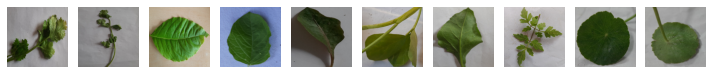

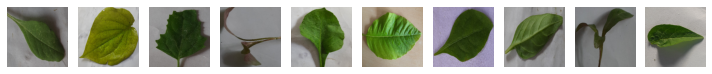

In [ ]:
plotImages(imgs)
imgs, labels = next(test_batches)
plotImages(imgs)
#print(labels)

In [ ]:
train_ds= tf.keras.utils.image_dataset_from_directory(
  train_path ,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(224, 224),
  labels='inferred',
  label_mode='categorical',
  batch_size=15
  )
print(train_ds)

Found 1983 files belonging to 25 classes.
Using 1587 files for training.
<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 25), dtype=tf.float32, name=None))>


Vgg-16 Architecture of CNN & model building

In [ ]:
model = Sequential([
     Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
     Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
     MaxPool2D(pool_size=(2, 2), strides=2),

     Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'),
     Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'),
     MaxPool2D(pool_size=(2, 2), strides=2),

     Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding = 'same'),
     Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding = 'same'),
     Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding = 'same'),
     MaxPool2D(pool_size=(2, 2), strides=2),

     Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding = 'same'),
     Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding = 'same'),
     Conv2D(filters= 512, kernel_size=(3, 3), activation='relu', padding = 'same'),
     MaxPool2D(pool_size=(2, 2), strides=2),

     Flatten(),
     Dense(units=25, activation='softmax')
     Dense(units=25, activation='softmax')
     Dense(units=25, activation='softmax')


])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

Accuracy of each epoch and plot of Test batch

Epoch 1/10
199/199 [==============================] - 726s 4s/step - loss: 0.9449 - accuracy: 0.6878 - val_loss: 0.6576 - val_accuracy: 0.7781
Epoch 2/10
199/199 [==============================] - 721s 4s/step - loss: 0.8854 - accuracy: 0.7060 - val_loss: 0.7355 - val_accuracy: 0.7650
Epoch 3/10
199/199 [==============================] - 717s 4s/step - loss: 0.8367 - accuracy: 0.7211 - val_loss: 0.6282 - val_accuracy: 0.7877
Epoch 4/10
199/199 [==============================] - 721s 4s/step - loss: 0.8544 - accuracy: 0.7161 - val_loss: 0.4894 - val_accuracy: 0.8422
Epoch 5/10
199/199 [==============================] - 723s 4s/step - loss: 0.7996 - accuracy: 0.7307 - val_loss: 0.8297 - val_accuracy: 0.7327
Epoch 6/10
199/199 [==============================] - 718s 4s/step - loss: 0.7896 - accuracy: 0.7519 - val_loss: 0.5842 - val_accuracy: 0.7973
Epoch 7/10
199/199 [==============================] - 718s 4s/step - loss: 0.7377 - accuracy: 0.7534 - val_loss: 0.4254 - val_accuracy: 0.8659

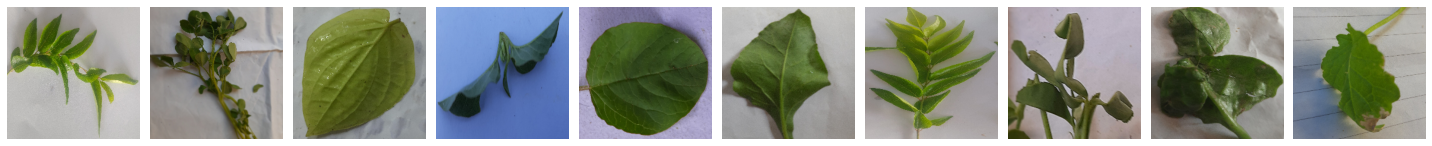

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0.]]
26/26 [==============================] - 30s 1s/step - loss: 11.0662 - accuracy: 0.2213
[11.066204071044922, 0.22134387493133545]
Saved model to disk


In [ ]:
model.fit(train_batches,epochs=10, validation_data=validation_batches)
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)
print(model.evaluate(x=test_batches))

np.round(predictions)
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

model.save("model.h5")
print("Saved model to disk")

***NOW USE TRAINED MODEL ***

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import load_img
from keras.models import load_model
import numpy as np


#Creating a dictionary to map each of the indexes to the corresponding number or letter

d = {'Amaranthus Green': 0,
 'Amaranthus Red': 1,
 'Balloon vine': 2,
 'Betel Leaves': 3,
 'Black Night Shade': 4,
 'Celery': 5,
 'Chinese Spinach': 6,
 'Coriander Leaves': 7,
 'Curry Leaf': 8,
 'Dwarf Copperleaf (Green)': 9,
 'Dwarf copperleaf (Red)': 10,
 'False Amarnath': 11,
 'Fenugreek Leaves': 12,
 'Giant Pigweed': 13,
 'Gongura': 14,
 'Indian pennywort': 15,
 'Lagos Spinach': 16,
 'Lambs Quarters': 17,
 'Lettuce Tree': 18,
 'Malabar Spinach (Green)': 19,
 'Mint Leaves': 20,
 'Mustard': 21,
 'Palak': 22,
 'Siru Keerai': 23,
 'Water Spinach': 24}

l = []
p = []
for x in d.keys():
    l.append(d[x])
    p.append(x)
#print(p,l)
result = dict()
for x in range(len(l)):
    if p[x] not in result:
       result[l[x]] = p[x]
print(result)


{0: 'Amaranthus Green', 1: 'Amaranthus Red', 2: 'Balloon vine', 3: 'Betel Leaves', 4: 'Black Night Shade', 5: 'Celery', 6: 'Chinese Spinach', 7: 'Coriander Leaves', 8: 'Curry Leaf', 9: 'Dwarf Copperleaf (Green)', 10: 'Dwarf copperleaf (Red)', 11: 'False Amarnath', 12: 'Fenugreek Leaves', 13: 'Giant Pigweed', 14: 'Gongura', 15: 'Indian pennywort', 16: 'Lagos Spinach', 17: 'Lambs Quarters', 18: 'Lettuce Tree', 19: 'Malabar Spinach (Green)', 20: 'Mint Leaves', 21: 'Mustard', 22: 'Palak', 23: 'Siru Keerai', 24: 'Water Spinach'}


In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import load_img
from keras.models import load_model
import numpy as np

# Predicting images
MODEL_PATH = '/content/model.h5'
model_dl = load_model(MODEL_PATH)

img = image.load_img("/content/drive/MyDrive/Colab Notebooks/CP/IPAC/Spinach/Test/Balloon vine/P_20200209_080501.jpg", target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

image = np.vstack([x])
Result = model.predict(image)
flag = False
for x in Result[0]:
    if int(x)==1:
       print(f"This is {result[list(Result[0]).index(x)]} plant")
       flag = True
if flag==False:
   print("Model Failed....")


1/1 [==============================] - 0s 59ms/step
This is Balloon vine plant


In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import load_img
from keras.models import load_model
import numpy as np
from PIL import Image

# Predicting images
MODEL_PATH = '/content/model.h5'
model_dl = load_model(MODEL_PATH)
kll = "/content/drive/MyDrive/Colab Notebooks/CP/IPAC/Spinach/Test/Balloon vine/P_20200223_094831.jpg"
img = image.load_img(kll, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

image = np.vstack([x])
Result = model.predict(image)
flag = False
for x in Result[0]:
    if int(x)==1:
       print(f"This is {result[list(Result[0]).index(x)]} plant")
       flag = True
if flag==False:
   print("Model Failed....")



1/1 [==============================] - 0s 58ms/step
This is Curry Leaf plant


In [ ]:

from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import load_img
from keras.models import load_model
import numpy as np
from PIL import Image

# Predicting images
MODEL_PATH = '/content/drive/MyDrive/Colab Notebooks/model.h5'
model_dl = load_model(MODEL_PATH)

kll = "/content/drive/MyDrive/Colab Notebooks/CP/IPAC/Spinach/Test/Amaranthus Red/P_20200209_075832.jpg"
img = image.load_img(kll, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

image = np.vstack([x])
Result = model_dl.predict(image)
flag = False
result  = {0: 'Amaranthus Green', 1: 'Amaranthus Red', 2: 'Balloon vine', 3: 'Betel Leaves', 4: 'Black Night Shade', 5: 'Celery', 6: 'Chinese Spinach', 7: 'Coriander Leaves', 8: 'Curry Leaf', 9: 'Dwarf Copperleaf (Green)', 10: 'Dwarf copperleaf (Red)', 11: 'False Amarnath', 12: 'Fenugreek Leaves', 13: 'Giant Pigweed', 14: 'Gongura', 15: 'Indian pennywort', 16: 'Lagos Spinach', 17: 'Lambs Quarters', 18: 'Lettuce Tree', 19: 'Malabar Spinach (Green)', 20: 'Mint Leaves', 21: 'Mustard', 22: 'Palak', 23: 'Siru Keerai', 24: 'Water Spinach'}
for x in Result[0]:
    if int(x)==1:
       print(f"This is {result[list(Result[0]).index(x)]} plant")
       flag = True
if flag==False:
   print("Model Failed....")



1/1 [==============================] - 0s 235ms/step
This is Amaranthus Green plant


In [ ]:

from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import load_img
from keras.models import load_model
import numpy as np
from PIL import Image

# Predicting images
MODEL_PATH = '/content/drive/MyDrive/Colab Notebooks/model.h5'
model_dl = load_model(MODEL_PATH)

kll = "/content/drive/MyDrive/Colab Notebooks/CP/IPAC/MepcoTropicLeaf/Database/Holy Basil.zip/015_12.jpg"
img = image.load_img(kll, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

image = np.vstack([x])
Result = model_dl.predict(image)
flag = False
result  = {0: 'Amaranthus Green', 1: 'Amaranthus Red', 2: 'Balloon vine', 3: 'Betel Leaves', 4: 'Black Night Shade', 5: 'Celery', 6: 'Chinese Spinach', 7: 'Coriander Leaves', 8: 'Curry Leaf', 9: 'Dwarf Copperleaf (Green)', 10: 'Dwarf copperleaf (Red)', 11: 'False Amarnath', 12: 'Fenugreek Leaves', 13: 'Giant Pigweed', 14: 'Gongura', 15: 'Indian pennywort', 16: 'Lagos Spinach', 17: 'Lambs Quarters', 18: 'Lettuce Tree', 19: 'Malabar Spinach (Green)', 20: 'Mint Leaves', 21: 'Mustard', 22: 'Palak', 23: 'Siru Keerai', 24: 'Water Spinach'}
for x in Result[0]:
    if int(x)==1:
       print(f"This is {result[list(Result[0]).index(x)]} plant")
       flag = True
if flag==False:
   print("Model Failed....")



In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import load_img
from keras.models import load_model
import numpy as np
from PIL import Image
result = {
    0: 'Amaranthus Green - Medicinal use: Rich in antioxidants and used for improving digestion and boosting immunity',
    1: 'Amaranthus Red - Medicinal use: Contains anti-inflammatory properties and used for treating skin disorders and promoting cardiovascular health',
    2: 'Balloon vine - Medicinal use: Traditionally used for reducing inflammation, treating respiratory conditions, and supporting liver health',
    3: 'Betel Leaves - Medicinal use: Known for their antimicrobial and analgesic properties, used for treating oral health issues and improving digestion',
    4: 'Black Night Shade - Medicinal use: Used in traditional medicine for its anti-inflammatory, diuretic, and anticancer properties',
    5: 'Celery - Medicinal use: Rich in antioxidants and known for its anti-inflammatory and diuretic effects, used for promoting heart and digestive health',
    6: 'Chinese Spinach - Medicinal use: Contains various vitamins and minerals, used for promoting eye health and strengthening the immune system',
    7: 'Coriander Leaves - Medicinal use: Known for their antioxidant and anti-inflammatory properties, used for improving digestion and promoting heart health',
    8: 'Curry Leaf - Medicinal use: Contains essential nutrients and used for treating digestive issues, promoting hair health, and supporting liver function',
    9: 'Dwarf Copperleaf (Green) - Medicinal use: Traditionally used for treating skin infections, reducing inflammation, and supporting wound healing',
    10: 'Dwarf Copperleaf (Red) - Medicinal use: Known for its anti-inflammatory and antimicrobial properties, used for wound healing and skin health',
    11: 'False Amarnath - Medicinal use: Contains antioxidants and used for reducing inflammation, managing diabetes, and promoting heart health',
    12: 'Fenugreek Leaves - Medicinal use: Known for their anti-inflammatory and antimicrobial properties, used for improving digestion and managing blood sugar levels',
    13: 'Giant Pigweed - Medicinal use: Traditionally used for its diuretic properties and in the treatment of urinary tract infections and kidney stones',
    14: 'Gongura - Medicinal use: Rich in antioxidants and used for reducing cholesterol levels, managing blood pressure, and promoting liver health',
    15: 'Indian pennywort - Medicinal use: Known for its cognitive-enhancing properties and used for improving memory, reducing anxiety, and promoting skin health',
    16: 'Lagos Spinach - Medicinal use: Contains essential vitamins and minerals, used for promoting bone health, managing diabetes, and supporting digestion',
    17: 'Lambs Quarters - Medicinal use: Traditionally used for its diuretic properties and in the treatment of rheumatic disorders and urinary tract infections',
    18: 'Lettuce Tree - Medicinal use: Rich in antioxidants and used for reducing inflammation, promoting heart health, and supporting digestion',
    19: 'Malabar Spinach (Green) - Medicinal use: Known for its cooling properties, used for treating digestive disorders and reducing body heat',
    20: 'Mint Leaves - Medicinal use: Contains menthol and used for relieving indigestion, reducing headaches, and freshening breath',
    21: 'Mustard - Medicinal use: Contains compounds with antimicrobial properties, used for treating respiratory issues and improving circulation',
    22: 'Palak - Medicinal use: Rich in iron and other essential nutrients, used for improving hemoglobin levels, promoting eye health, and boosting immunity',
    23: 'Siru Keerai - Medicinal use: Known for its anti-inflammatory and antioxidant properties, used for managing diabetes, supporting digestion, and promoting bone health',
    24: 'Water Spinach - Medicinal use: Contains vitamins and minerals, used for reducing cholesterol levels, improving digestion, and supporting cardiovascular health'
}

# Predicting images
MODEL_PATH = '/content/drive/MyDrive/EDAI_SEM_2/CNN_model.h5'
model_dl = load_model(MODEL_PATH)

kll = "/content/drive/MyDrive/EDAI_SEM_2/CL.jpg"
img = image.load_img(kll, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

image = np.vstack([x])
Result = model_dl.predict(image)
flag = False
for x in Result[0]:
    if int(x)==1:
       print(f"This is {result[list(Result[0]).index(x)]} plant")
       flag = True
if flag==False:
   print("Model Failed....")



1/1 [==============================] - 0s 111ms/step
This is Balloon vine - Medicinal use: Traditionally used for reducing inflammation, treating respiratory conditions, and supporting liver health plant


In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import load_img
from keras.models import load_model
import numpy as np
from PIL import Image
result = {
    0: 'Amaranthus Green - Medicinal use: Rich in antioxidants and used for improving digestion and boosting immunity',
    1: 'Amaranthus Red - Medicinal use: Contains anti-inflammatory properties and used for treating skin disorders and promoting cardiovascular health',
    2: 'Balloon vine - Medicinal use: Traditionally used for reducing inflammation, treating respiratory conditions, and supporting liver health',
    3: 'Betel Leaves - Medicinal use: Known for their antimicrobial and analgesic properties, used for treating oral health issues and improving digestion',
    4: 'Black Night Shade - Medicinal use: Used in traditional medicine for its anti-inflammatory, diuretic, and anticancer properties',
    5: 'Celery - Medicinal use: Rich in antioxidants and known for its anti-inflammatory and diuretic effects, used for promoting heart and digestive health',
    6: 'Chinese Spinach - Medicinal use: Contains various vitamins and minerals, used for promoting eye health and strengthening the immune system',
    7: 'Coriander Leaves - Medicinal use: Known for their antioxidant and anti-inflammatory properties, used for improving digestion and promoting heart health',
    8: 'Curry Leaf - Medicinal use: Contains essential nutrients and used for treating digestive issues, promoting hair health, and supporting liver function',
    9: 'Dwarf Copperleaf (Green) - Medicinal use: Traditionally used for treating skin infections, reducing inflammation, and supporting wound healing',
    10: 'Dwarf Copperleaf (Red) - Medicinal use: Known for its anti-inflammatory and antimicrobial properties, used for wound healing and skin health',
    11: 'False Amarnath - Medicinal use: Contains antioxidants and used for reducing inflammation, managing diabetes, and promoting heart health',
    12: 'Fenugreek Leaves - Medicinal use: Known for their anti-inflammatory and antimicrobial properties, used for improving digestion and managing blood sugar levels',
    13: 'Giant Pigweed - Medicinal use: Traditionally used for its diuretic properties and in the treatment of urinary tract infections and kidney stones',
    14: 'Gongura - Medicinal use: Rich in antioxidants and used for reducing cholesterol levels, managing blood pressure, and promoting liver health',
    15: 'Indian pennywort - Medicinal use: Known for its cognitive-enhancing properties and used for improving memory, reducing anxiety, and promoting skin health',
    16: 'Lagos Spinach - Medicinal use: Contains essential vitamins and minerals, used for promoting bone health, managing diabetes, and supporting digestion',
    17: 'Lambs Quarters - Medicinal use: Traditionally used for its diuretic properties and in the treatment of rheumatic disorders and urinary tract infections',
    18: 'Lettuce Tree - Medicinal use: Rich in antioxidants and used for reducing inflammation, promoting heart health, and supporting digestion',
    19: 'Malabar Spinach (Green) - Medicinal use: Known for its cooling properties, used for treating digestive disorders and reducing body heat',
    20: 'Mint Leaves - Medicinal use: Contains menthol and used for relieving indigestion, reducing headaches, and freshening breath',
    21: 'Mustard - Medicinal use: Contains compounds with antimicrobial properties, used for treating respiratory issues and improving circulation',
    22: 'Palak - Medicinal use: Rich in iron and other essential nutrients, used for improving hemoglobin levels, promoting eye health, and boosting immunity',
    23: 'Siru Keerai - Medicinal use: Known for its anti-inflammatory and antioxidant properties, used for managing diabetes, supporting digestion, and promoting bone health',
    24: 'Water Spinach - Medicinal use: Contains vitamins and minerals, used for reducing cholesterol levels, improving digestion, and supporting cardiovascular health'
}
# Predicting images
MODEL_PATH = '/content/drive/MyDrive/EDAI_SEM_2/CNN_model.h5'
model_dl = load_model(MODEL_PATH)

kll = "/content/drive/MyDrive/EDAI_SEM_2/Cin_Sp.jpg"
img = image.load_img(kll, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

image = np.vstack([x])
Result = model_dl.predict(image)
flag = False
for x in Result[0]:
    if int(x)==1:
       print(f"This is {result[list(Result[0]).index(x)]} plant")
       flag = True
if flag==False:
   print("Model Failed....")


1/1 [==============================] - 0s 87ms/step
This is Chinese Spinach - Medicinal use: Contains various vitamins and minerals, used for promoting eye health and strengthening the immune system plant


In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import load_img
from keras.models import load_model
import numpy as np
from PIL import Image
result = {
    0: 'Amaranthus Green - Medicinal use: Rich in antioxidants and used for improving digestion and boosting immunity',
    1: 'Amaranthus Red - Medicinal use: Contains anti-inflammatory properties and used for treating skin disorders and promoting cardiovascular health',
    2: 'Balloon vine - Medicinal use: Traditionally used for reducing inflammation, treating respiratory conditions, and supporting liver health',
    3: 'Betel Leaves - Medicinal use: Known for their antimicrobial and analgesic properties, used for treating oral health issues and improving digestion',
    4: 'Black Night Shade - Medicinal use: Used in traditional medicine for its anti-inflammatory, diuretic, and anticancer properties',
    5: 'Celery - Medicinal use: Rich in antioxidants and known for its anti-inflammatory and diuretic effects, used for promoting heart and digestive health',
    6: 'Chinese Spinach - Medicinal use: Contains various vitamins and minerals, used for promoting eye health and strengthening the immune system',
    7: 'Coriander Leaves - Medicinal use: Known for their antioxidant and anti-inflammatory properties, used for improving digestion and promoting heart health',
    8: 'Curry Leaf - Medicinal use: Contains essential nutrients and used for treating digestive issues, promoting hair health, and supporting liver function',
    9: 'Dwarf Copperleaf (Green) - Medicinal use: Traditionally used for treating skin infections, reducing inflammation, and supporting wound healing',
    10: 'Dwarf Copperleaf (Red) - Medicinal use: Known for its anti-inflammatory and antimicrobial properties, used for wound healing and skin health',
    11: 'False Amarnath - Medicinal use: Contains antioxidants and used for reducing inflammation, managing diabetes, and promoting heart health',
    12: 'Fenugreek Leaves - Medicinal use: Known for their anti-inflammatory and antimicrobial properties, used for improving digestion and managing blood sugar levels',
    13: 'Giant Pigweed - Medicinal use: Traditionally used for its diuretic properties and in the treatment of urinary tract infections and kidney stones',
    14: 'Gongura - Medicinal use: Rich in antioxidants and used for reducing cholesterol levels, managing blood pressure, and promoting liver health',
    15: 'Indian pennywort - Medicinal use: Known for its cognitive-enhancing properties and used for improving memory, reducing anxiety, and promoting skin health',
    16: 'Lagos Spinach - Medicinal use: Contains essential vitamins and minerals, used for promoting bone health, managing diabetes, and supporting digestion',
    17: 'Lambs Quarters - Medicinal use: Traditionally used for its diuretic properties and in the treatment of rheumatic disorders and urinary tract infections',
    18: 'Lettuce Tree - Medicinal use: Rich in antioxidants and used for reducing inflammation, promoting heart health, and supporting digestion',
    19: 'Malabar Spinach (Green) - Medicinal use: Known for its cooling properties, used for treating digestive disorders and reducing body heat',
    20: 'Mint Leaves - Medicinal use: Contains menthol and used for relieving indigestion, reducing headaches, and freshening breath',
    21: 'Mustard - Medicinal use: Contains compounds with antimicrobial properties, used for treating respiratory issues and improving circulation',
    22: 'Palak - Medicinal use: Rich in iron and other essential nutrients, used for improving hemoglobin levels, promoting eye health, and boosting immunity',
    23: 'Siru Keerai - Medicinal use: Known for its anti-inflammatory and antioxidant properties, used for managing diabetes, supporting digestion, and promoting bone health',
    24: 'Water Spinach - Medicinal use: Contains vitamins and minerals, used for reducing cholesterol levels, improving digestion, and supporting cardiovascular health'
}
# Predicting images
MODEL_PATH = '/content/drive/MyDrive/Colab Notebooks/model.h5'
model_dl = load_model(MODEL_PATH)

kll = "/content/drive/MyDrive/Colab Notebooks/CP/IPAC/Spinach/Test/Balloon vine/P_20200223_094819.jpg"
img = image.load_img(kll, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

image = np.vstack([x])
Result = model_dl.predict(image)
flag = False
for x in Result[0]:
    if int(x)==1:
       print(f"This is {result[list(Result[0]).index(x)]} plant")
       flag = True
if flag==False:
   print("Model Failed....")


1/1 [==============================] - 8s 8s/step
This is Balloon vine - Medicinal use: Traditionally used for reducing inflammation, treating respiratory conditions, and supporting liver health plant
